# Quickstart

This notebook shows a quickstart of `daskperiment`.

`daskperiment` is a lightweight tool to perform reproducible machine learning experiment using `Dask`. It can be used in both `Jupyter` and command line (and also in standard `Python` interpreter). The benefits of `daskperiemnt` are:

- User-intuitive.
  - Minimizing modifications of existing codes.
  - Performing experiments using `Dask` compatible API.
  - Easily handle experiments history (with `pandas` basic operations).
  - Requires less work to manage with Git (no need to make branch per trials).
- Tracking experiment result and its (hyper) parameters.
- Tracking environment.
  - OS Info
  - Python version
  - Installed package and its version
- Tracking code context.
- Auto saving and loading previous experiment history.
- Parallel execution of experiment steps.

In [1]:
%matplotlib inline
import numpy as np
import daskperiment

First, create `daskperiment.Experiment` instance. This instance controlls an experiment, a chain of functions to output value and a collection of input variables.

In [2]:
ex = daskperiment.Experiment(id='quickstart_pj')

2019-01-31 15:31:38,984 [daskperiment.io.pickle] [INFO] Creating new cache directory: /Users/sinhrks/Git/daskperiment/notebook/daskperiment_cache/quickstart_pj
2019-01-31 15:31:38,992 [daskperiment.core.experiment] [INFO] Initialized new experiment: daskperiment_cache/quickstart_pj/quickstart_pj.pkl
2019-01-31 15:31:39,405 [daskperiment.core.environment] [INFO] Platform: Darwin-17.7.0-x86_64-i386-64bit
2019-01-31 15:31:39,406 [daskperiment.core.environment] [INFO] Python: CPython 3.6.6 (Jupyter Notebook)
2019-01-31 15:31:39,407 [daskperiment.core.environment] [INFO] daskperiment version: 0.2.0.dev0
2019-01-31 15:31:39,408 [daskperiment.core.environment] [INFO] daskperiment path: /Users/sinhrks/Git/daskperiment/daskperiment
2019-01-31 15:31:39,409 [daskperiment.core.environment] [INFO] Working directory: /Users/sinhrks/Git/daskperiment/notebook
2019-01-31 15:31:39,411 [daskperiment.core.environment] [INFO] Number of installed Python packages: 337


Then, use `Experiment.parameter` method to define parameters (input variables for the experiment). The actual value of each parameter can be changed in every trial.

In [3]:
a = ex.parameter('a')
b = ex.parameter('b')
a

Parameter(a: Undefined)

Next, you can define each experiment step (function) by decorating with `Experiment` instance (`@ex`).

Note that the function to output the final result (mostly objective value to be minimized or maximized) must be decorated with `Experiment.result`. The chain of these functions are expressed as `Dask.Delayed` instance.

In [4]:
@ex
def prepare_data(a, b):
    return a + b

@ex.result
def calculate_score(s):
    return 10 / s

d = prepare_data(a, b)
s = calculate_score(d)
s

Delayed('calculate_score-192f542e-652a-420e-ae1e-19cd83a21d45')

Thus, you can visualize computation graph via `.visualize` method.

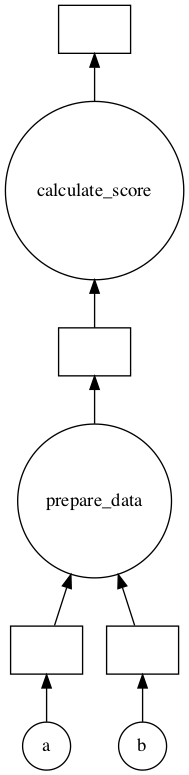

In [5]:
s.visualize()

Use `Experiment.set_parameters` method to set parameters for a trial. After setting parameters, `Parameter` variable and experiment result will be computable.

Parameters are recommended to be a scalar (or lightweight value) because these are stored as history (for example, passing filename as a parameter is　preffered rather than passing `DataFrame`).

In [6]:
ex.set_parameters(a=1, b=2)
a.compute()

2019-01-31 15:31:46,301 [daskperiment.core.parameter] [INFO] Updated parameters: a=1<class 'int'>, b=2<class 'int'>


1

In [7]:
s.compute()

2019-01-31 15:31:46,875 [daskperiment.core.trial] [INFO] Started Experiment (trial id=1)
2019-01-31 15:31:46,877 [daskperiment.core.experiment] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_1.py
2019-01-31 15:31:46,879 [daskperiment.core.experiment] [INFO] Saving device info: daskperiment_cache/quickstart_pj/environment/device_quickstart_pj_1.txt
2019-01-31 15:31:46,881 [daskperiment.core.experiment] [INFO] Saving python packages: daskperiment_cache/quickstart_pj/environment/requirements_quickstart_pj_1.txt
2019-01-31 15:31:46,887 [daskperiment.core.experiment] [INFO] Target: calculate_score-192f542e-652a-420e-ae1e-19cd83a21d45
2019-01-31 15:31:46,889 [daskperiment.core.experiment] [INFO] Parameters: a=1<class 'int'>, b=2<class 'int'>
2019-01-31 15:31:46,893 [daskperiment.core.trial] [INFO] Finished Experiment (trial id=1)
2019-01-31 15:31:46,894 [daskperiment.io.pickle] [INFO] Saving Experiment(id: quickstart_pj, trial_id: 1) to path=daskperiment_cach

3.3333333333333335

You can update any parameters for next trial. Every trials can be distinguished by trial id.

In [8]:
ex.set_parameters(b=3)
s.compute()

2019-01-31 15:31:48,247 [daskperiment.core.parameter] [INFO] Updated parameters: a=1<class 'int'>, b=3<class 'int'>
2019-01-31 15:31:48,248 [daskperiment.core.trial] [INFO] Started Experiment (trial id=2)
2019-01-31 15:31:48,250 [daskperiment.core.experiment] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_2.py
2019-01-31 15:31:48,253 [daskperiment.core.experiment] [INFO] Saving device info: daskperiment_cache/quickstart_pj/environment/device_quickstart_pj_2.txt
2019-01-31 15:31:48,255 [daskperiment.core.experiment] [INFO] Saving python packages: daskperiment_cache/quickstart_pj/environment/requirements_quickstart_pj_2.txt
2019-01-31 15:31:48,261 [daskperiment.core.experiment] [INFO] Target: calculate_score-192f542e-652a-420e-ae1e-19cd83a21d45
2019-01-31 15:31:48,263 [daskperiment.core.experiment] [INFO] Parameters: a=1<class 'int'>, b=3<class 'int'>
2019-01-31 15:31:48,269 [daskperiment.core.trial] [INFO] Finished Experiment (trial id=2)
2019-01-31 15:3

2.5

After some trials, you can retrieve parameter values specifying trial id.

In [9]:
ex.get_parameters(trial_id=1)

{'a': 1, 'b': 2}

In [10]:
ex.get_parameters(trial_id=2)

{'a': 1, 'b': 3}

`Experiment.get_history` will return a `DataFrame` which stores a history of trial parameters and its results. You can select desirable trial using `pandas` basic operation.

In [11]:
ex.get_history()

,a,b,Result,Success,Finished,Process Time,Description
Trial ID,,,,,,,
1,1,2,3.333333,True,2019-01-31 15:31:46.893567,00:00:00.018020,NaN
2,1,3,2.500000,True,2019-01-31 15:31:48.269417,00:00:00.020506,NaN


When any error occurs, `Experiment` instance stores the log as failed trial. The "Description" column contains the error detail.

In [12]:
ex.set_parameters(a=1, b=-1)
try:
    s.compute()
    
except ZeroDivisionError as e:
    # To hide stack trace
    print('{}({})'.format(e.__class__.__name__, e))

2019-01-31 15:32:33,078 [daskperiment.core.parameter] [INFO] Updated parameters: a=1<class 'int'>, b=-1<class 'int'>
2019-01-31 15:32:33,080 [daskperiment.core.trial] [INFO] Started Experiment (trial id=3)
2019-01-31 15:32:33,082 [daskperiment.core.experiment] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_3.py
2019-01-31 15:32:33,084 [daskperiment.core.experiment] [INFO] Saving device info: daskperiment_cache/quickstart_pj/environment/device_quickstart_pj_3.txt
2019-01-31 15:32:33,086 [daskperiment.core.experiment] [INFO] Saving python packages: daskperiment_cache/quickstart_pj/environment/requirements_quickstart_pj_3.txt
2019-01-31 15:32:33,089 [daskperiment.core.experiment] [INFO] Target: calculate_score-192f542e-652a-420e-ae1e-19cd83a21d45
2019-01-31 15:32:33,091 [daskperiment.core.experiment] [INFO] Parameters: a=1<class 'int'>, b=-1<class 'int'>
2019-01-31 15:32:33,094 [daskperiment.core.experiment] [ERROR] Experiment failed: ZeroDivisionError(div

ZeroDivisionError(division by zero)


In [13]:
ex.get_history()

,a,b,Result,Success,Finished,Process Time,Description
Trial ID,,,,,,,
1,1,2,3.333333,True,2019-01-31 15:31:46.893567,00:00:00.018020,NaN
2,1,3,2.500000,True,2019-01-31 15:31:48.269417,00:00:00.020506,NaN
3,1,-1,NaN,False,2019-01-31 15:32:33.095082,00:00:00.014526,ZeroDivisionError(division by zero)


Every time the computation performed, `Experiment` instance is automatically saved to specified cache directory. When `Experiment` instance is initialized, it automatically load previous trials (check trial id in the log).

# Handling intermediate result

Next example shows how to retrieve an intermediate result of the chain.

The only difference is using `Experiment.persist` decorator. It makes `Experiment` instance to keep the decorated function's intermediate result. After definition, rebuilt the same workflow using the persisted function. 

Note that an intermediate result is saved as a pickle file named with its function name, function name must be unique in the experiment.

In [14]:
@ex.persist
def prepare_data(a, b):
    return a + b

d = prepare_data(a, b)
s = calculate_score(d)

2019-01-31 15:32:34,903 [daskperiment.core.code] [WARNING] Code context has been changed: prepare_data
2019-01-31 15:32:34,905 [daskperiment.core.code] [WARNING] @@ -1,3 +1,3 @@

2019-01-31 15:32:34,907 [daskperiment.core.code] [WARNING] -@ex
2019-01-31 15:32:34,909 [daskperiment.core.code] [WARNING] +@ex.persist
2019-01-31 15:32:34,911 [daskperiment.core.code] [WARNING]  def prepare_data(a, b):
2019-01-31 15:32:34,912 [daskperiment.core.code] [WARNING]      return a + b


NOTE: Also, you can notice that `daskperiment` outputs some "WARNING" indicating code contexts has been changed. It's because `daskperiment` automatically tracks code context to guarantee reproducibility.

Let's perform some trials.

In [15]:
ex.set_parameters(a=1, b=2)
s.compute()

2019-01-31 15:32:36,011 [daskperiment.core.parameter] [INFO] Updated parameters: a=1<class 'int'>, b=2<class 'int'>
2019-01-31 15:32:36,012 [daskperiment.core.trial] [INFO] Started Experiment (trial id=4)
2019-01-31 15:32:36,013 [daskperiment.core.experiment] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_4.py
2019-01-31 15:32:36,017 [daskperiment.core.experiment] [INFO] Saving device info: daskperiment_cache/quickstart_pj/environment/device_quickstart_pj_4.txt
2019-01-31 15:32:36,019 [daskperiment.core.experiment] [INFO] Saving python packages: daskperiment_cache/quickstart_pj/environment/requirements_quickstart_pj_4.txt
2019-01-31 15:32:36,023 [daskperiment.core.experiment] [INFO] Target: calculate_score-44b5bb7e-9b57-4736-935f-3d10f410e7c5
2019-01-31 15:32:36,024 [daskperiment.core.experiment] [INFO] Parameters: a=1<class 'int'>, b=2<class 'int'>
2019-01-31 15:32:36,027 [daskperiment.io.pickle] [INFO] Saving 3 to path=daskperiment_cache/quickstart_pj

3.3333333333333335

In [16]:
ex.set_parameters(a=3, b=2)
s.compute()

2019-01-31 15:32:36,611 [daskperiment.core.parameter] [INFO] Updated parameters: a=3<class 'int'>, b=2<class 'int'>
2019-01-31 15:32:36,613 [daskperiment.core.trial] [INFO] Started Experiment (trial id=5)
2019-01-31 15:32:36,615 [daskperiment.core.experiment] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_5.py
2019-01-31 15:32:36,617 [daskperiment.core.experiment] [INFO] Saving device info: daskperiment_cache/quickstart_pj/environment/device_quickstart_pj_5.txt
2019-01-31 15:32:36,620 [daskperiment.core.experiment] [INFO] Saving python packages: daskperiment_cache/quickstart_pj/environment/requirements_quickstart_pj_5.txt
2019-01-31 15:32:36,624 [daskperiment.core.experiment] [INFO] Target: calculate_score-44b5bb7e-9b57-4736-935f-3d10f410e7c5
2019-01-31 15:32:36,625 [daskperiment.core.experiment] [INFO] Parameters: a=3<class 'int'>, b=2<class 'int'>
2019-01-31 15:32:36,628 [daskperiment.io.pickle] [INFO] Saving 5 to path=daskperiment_cache/quickstart_pj

2.0

You can retrieve intermediate results via `Experiment.get_persisted` method by specifying function name and trial id.

In [17]:
ex.get_persisted('prepare_data', trial_id=4)

2019-01-31 15:32:37,361 [daskperiment.io.pickle] [INFO] Loaded 3 from path=daskperiment_cache/quickstart_pj/persist/quickstart_pj_prepare_data_4.pkl


3

In [18]:
ex.get_persisted('prepare_data', trial_id=5)

2019-01-31 15:32:39,097 [daskperiment.io.pickle] [INFO] Loaded 5 from path=daskperiment_cache/quickstart_pj/persist/quickstart_pj_prepare_data_5.pkl


5

# Monitoring metrics

You may need to monitor transition of some metrics during each trial. In each experiment function, you can call `Experiment.save_metric` to save metric with its key (name) and epoch.

In [19]:
@ex.result
def calculate_score(s):
    for i in range(100):
        ex.save_metric('dummy_score', epoch=i, value=100 - np.random.random() * i)
        
    return 10 / s

d = prepare_data(a, b)
s = calculate_score(d)

2019-01-31 15:32:40,020 [daskperiment.core.code] [WARNING] Code context has been changed: calculate_score
2019-01-31 15:32:40,021 [daskperiment.core.code] [WARNING] @@ -1,3 +1,6 @@

2019-01-31 15:32:40,023 [daskperiment.core.code] [WARNING]  @ex.result
2019-01-31 15:32:40,024 [daskperiment.core.code] [WARNING]  def calculate_score(s):
2019-01-31 15:32:40,025 [daskperiment.core.code] [WARNING] +    for i in range(100):
2019-01-31 15:32:40,026 [daskperiment.core.code] [WARNING] +        ex.save_metric('dummy_score', epoch=i, value=100 - np.random.random() * i)
2019-01-31 15:32:40,027 [daskperiment.core.code] [WARNING] +        
2019-01-31 15:32:40,028 [daskperiment.core.code] [WARNING]      return 10 / s


In [20]:
ex.set_parameters(a=1, b=2)
s.compute()

2019-01-31 15:32:40,290 [daskperiment.core.parameter] [INFO] Updated parameters: a=1<class 'int'>, b=2<class 'int'>
2019-01-31 15:32:40,291 [daskperiment.core.trial] [INFO] Started Experiment (trial id=6)
2019-01-31 15:32:40,292 [daskperiment.core.experiment] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_6.py
2019-01-31 15:32:40,295 [daskperiment.core.experiment] [INFO] Saving device info: daskperiment_cache/quickstart_pj/environment/device_quickstart_pj_6.txt
2019-01-31 15:32:40,297 [daskperiment.core.experiment] [INFO] Saving python packages: daskperiment_cache/quickstart_pj/environment/requirements_quickstart_pj_6.txt
2019-01-31 15:32:40,300 [daskperiment.core.experiment] [INFO] Target: calculate_score-a357f485-327d-4507-9f23-ce6a78a62ff9
2019-01-31 15:32:40,301 [daskperiment.core.experiment] [INFO] Parameters: a=1<class 'int'>, b=2<class 'int'>
2019-01-31 15:32:40,304 [daskperiment.io.pickle] [INFO] Saving 3 to path=daskperiment_cache/quickstart_pj

3.3333333333333335

After a trial, you can load saved metric using `Experiment.load_metric` specifying its name and trial_id. As it is returned as `DataFrame`, you can easily investigate it.

In [21]:
dummy_score = ex.load_metric('dummy_score', trial_id=6)
dummy_score.head()

Trial ID,6
Epoch,
0,100.000000
1,99.055496
2,98.063136
3,98.932566
4,97.138714


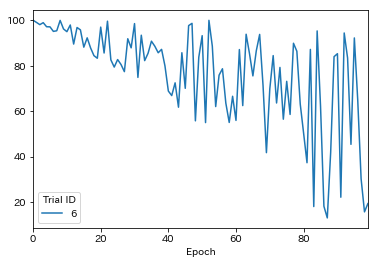

In [22]:
dummy_score.plot()

Perform another trial.

In [23]:
ex.set_parameters(a=3, b=4)
s.compute()

2019-01-31 15:32:41,843 [daskperiment.core.parameter] [INFO] Updated parameters: a=3<class 'int'>, b=4<class 'int'>
2019-01-31 15:32:41,845 [daskperiment.core.trial] [INFO] Started Experiment (trial id=7)
2019-01-31 15:32:41,847 [daskperiment.core.experiment] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_7.py
2019-01-31 15:32:41,849 [daskperiment.core.experiment] [INFO] Saving device info: daskperiment_cache/quickstart_pj/environment/device_quickstart_pj_7.txt
2019-01-31 15:32:41,851 [daskperiment.core.experiment] [INFO] Saving python packages: daskperiment_cache/quickstart_pj/environment/requirements_quickstart_pj_7.txt
2019-01-31 15:32:41,855 [daskperiment.core.experiment] [INFO] Target: calculate_score-a357f485-327d-4507-9f23-ce6a78a62ff9
2019-01-31 15:32:41,857 [daskperiment.core.experiment] [INFO] Parameters: a=3<class 'int'>, b=4<class 'int'>
2019-01-31 15:32:41,860 [daskperiment.io.pickle] [INFO] Saving 7 to path=daskperiment_cache/quickstart_pj

1.4285714285714286

To compare metrics between trials, pass multiple trial ids to `Experiment.load_metric`.

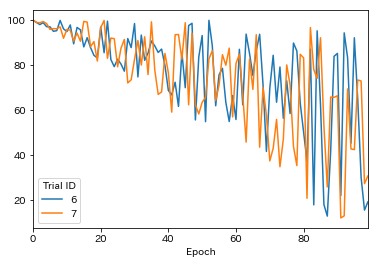

In [24]:
ex.load_metric('dummy_score', trial_id=[6, 7]).plot()

# Check code context

The above example illustrated `daskperiment` tracks code contexts decorated with `Experiment` decorators. 

To check the tracked code contexts, use `Experiment.get_code` specifying trial id (shows current code if trial id is not provided).

In [25]:
print(ex.get_code())

@ex.persist
def prepare_data(a, b):
    return a + b


@ex.result
def calculate_score(s):
    for i in range(100):
        ex.save_metric('dummy_score', epoch=i, value=100 - np.random.random() * i)
        
    return 10 / s



In [26]:
print(ex.get_code(trial_id=1))

@ex
def prepare_data(a, b):
    return a + b


@ex.result
def calculate_score(s):
    return 10 / s



Each code context is also saved as a text file per trial id. Thus, these are easily handled by diff tools and  Git.

In [27]:
%cat daskperiment_cache/quickstart_pj/code/quickstart_pj_1.txt

cat: daskperiment_cache/quickstart_pj/code/quickstart_pj_1.txt: No such file or directory


# Save experiment result

`daskperiment` automatically saves its internal state when the experiment result is computed (when `.compute` is called). Also, `Experiment` instance automatically recover previous state when it is instanciated.

Following example instanciates `Experiment` instance using the same id as above. Thus, the created `Experiment` automatically recovers its state. 

In [28]:
ex_new = daskperiment.Experiment(id='quickstart_pj')

2019-01-31 15:32:44,912 [daskperiment.io.pickle] [INFO] Use existing cache directory: /Users/sinhrks/Git/daskperiment/notebook/daskperiment_cache/quickstart_pj
2019-01-31 15:32:44,917 [daskperiment.io.pickle] [INFO] Loaded Experiment(id: quickstart_pj, trial_id: 7) from path=daskperiment_cache/quickstart_pj/quickstart_pj.pkl
2019-01-31 15:32:44,919 [daskperiment.core.environment] [INFO] Platform: Darwin-17.7.0-x86_64-i386-64bit
2019-01-31 15:32:44,920 [daskperiment.core.environment] [INFO] Python: CPython 3.6.6 (Jupyter Notebook)
2019-01-31 15:32:44,922 [daskperiment.core.environment] [INFO] daskperiment version: 0.2.0.dev0
2019-01-31 15:32:44,923 [daskperiment.core.environment] [INFO] daskperiment path: /Users/sinhrks/Git/daskperiment/daskperiment
2019-01-31 15:32:44,924 [daskperiment.core.environment] [INFO] Working directory: /Users/sinhrks/Git/daskperiment/notebook
2019-01-31 15:32:44,925 [daskperiment.core.environment] [INFO] Number of installed Python packages: 337


Calling `.get_history` returns infomation of previous trials.

In [29]:
ex_new.get_history()

,a,b,Result,Success,Finished,Process Time,Description
Trial ID,,,,,,,
1,1,2,3.333333,True,2019-01-31 15:31:46.893567,00:00:00.018020,NaN
2,1,3,2.500000,True,2019-01-31 15:31:48.269417,00:00:00.020506,NaN
3,1,-1,NaN,False,2019-01-31 15:32:33.095082,00:00:00.014526,ZeroDivisionError(division by zero)
4,1,2,3.333333,True,2019-01-31 15:32:36.029693,00:00:00.016964,NaN
5,3,2,2.000000,True,2019-01-31 15:32:36.630745,00:00:00.017276,NaN
6,1,2,3.333333,True,2019-01-31 15:32:40.307269,00:00:00.015759,NaN
7,3,4,1.428571,True,2019-01-31 15:32:41.864061,00:00:00.018704,NaN


Also, `Experiment` instance automatically detects the environment change from its previous trial. Following is a sample log when package update is detected (pandas 0.23.4 -> 0.24.0).

    2019-01-29 00:22:35,357 [daskperiment.io.serialize] [INFO] Loaded Experiment(id: quickstart_pj, trial_id: 14) from path=daskperiment_cache/quickstart_pj/quickstart_pj.pkl
    2019-01-29 00:22:35,404 [daskperiment.core.environment] [WARNING] Installed Python packages have been changed
    2019-01-29 00:22:35,408 [daskperiment.core.environment] [WARNING] @@ -142 +142 @@
    2019-01-29 00:22:35,411 [daskperiment.core.environment] [WARNING] -pandas 0.23.4 (/Users/sinhrks/anaconda/lib/python3.6/site-packages)
    2019-01-29 00:22:35,412 [daskperiment.core.environment] [WARNING] +pandas 0.24.0 (/Users/sinhrks/anaconda/lib/python3.6/site-packages)

# Run as CLI

`daskperiment` also supports execution from command line. First, prepare a `Python` script to define experiment. The usage of `Experiment` class is all the same as Jupyter example. `daskperiment` regards a result of a function decorated with `Experiment.result` (`calculate_score` function in below case) as experinemt output.

In [30]:
%cat ../scripts/simple_experiment.py

import daskperiment

ex = daskperiment.Experiment(id='simple_experiment_pj')

a = ex.parameter('a')
b = ex.parameter('b')


@ex
def prepare_data(a, b):
    return a + b


@ex.result
def calculate_score(s):
    return s + 1


d = prepare_data(a, b)
calculate_score(d)


You can provide parameter values from command line options using `key=value` format. `daskperinemt` automatically parse parameters and perform computation.

In [31]:
!python ../scripts/simple_experiment.py a=1 b=2

2019-01-31 15:32:50,341 [daskperiment.io.pickle] [INFO] Creating new cache directory: /Users/sinhrks/Git/daskperiment/notebook/daskperiment_cache/simple_experiment_pj
2019-01-31 15:32:50,345 [daskperiment.core.experiment] [INFO] Initialized new experiment: daskperiment_cache/simple_experiment_pj/simple_experiment_pj.pkl
2019-01-31 15:32:50,927 [daskperiment.core.environment] [INFO] Platform: Darwin-17.7.0-x86_64-i386-64bit
2019-01-31 15:32:50,928 [daskperiment.core.environment] [INFO] Python: CPython 3.6.6 (File)
2019-01-31 15:32:50,928 [daskperiment.core.environment] [INFO] daskperiment version: 0.2.0.dev0
2019-01-31 15:32:50,928 [daskperiment.core.environment] [INFO] daskperiment path: /Users/sinhrks/Git/daskperiment/daskperiment
2019-01-31 15:32:50,928 [daskperiment.core.environment] [INFO] Working directory: /Users/sinhrks/Git/daskperiment/notebook
2019-01-31 15:32:50,928 [daskperiment.core.environment] [INFO] Number of installed Python packages: 337
2019-01-31 15:32:50,936 [daskpe

Let's perform multiple trials using different parameters. `daskperiment` automatically saves trial history as the same as Jupyter example (see trial id is incremented).

In [32]:
!python ../scripts/simple_experiment.py a=3 b=2

2019-01-31 15:33:03,324 [daskperiment.io.pickle] [INFO] Use existing cache directory: /Users/sinhrks/Git/daskperiment/notebook/daskperiment_cache/simple_experiment_pj
2019-01-31 15:33:03,337 [daskperiment.io.pickle] [INFO] Loaded Experiment(id: simple_experiment_pj, trial_id: 1) from path=daskperiment_cache/simple_experiment_pj/simple_experiment_pj.pkl
2019-01-31 15:33:04,052 [daskperiment.core.environment] [INFO] Platform: Darwin-17.7.0-x86_64-i386-64bit
2019-01-31 15:33:04,052 [daskperiment.core.environment] [INFO] Python: CPython 3.6.6 (File)
2019-01-31 15:33:04,052 [daskperiment.core.environment] [INFO] daskperiment version: 0.2.0.dev0
2019-01-31 15:33:04,053 [daskperiment.core.environment] [INFO] daskperiment path: /Users/sinhrks/Git/daskperiment/daskperiment
2019-01-31 15:33:04,053 [daskperiment.core.environment] [INFO] Working directory: /Users/sinhrks/Git/daskperiment/notebook
2019-01-31 15:33:04,053 [daskperiment.core.environment] [INFO] Number of installed Python packages: 33

To confirm the experinemt results, instanciate Experiment specifying the same id as the script and use Experiment.get_history.

In [33]:
import daskperiment

ex = daskperiment.Experiment(id='simple_experiment_pj')
ex.get_history()

2019-01-29 00:35:46,199 [daskperiment.io.serialize] [INFO] Use existing cache directory: /Users/sinhrks/Git/daskperiment/notebook/daskperiment_cache/simple_experiment_pj
2019-01-29 00:35:46,202 [daskperiment.io.serialize] [INFO] Loaded Experiment(id: simple_experiment_pj, trial_id: 2) from path=daskperiment_cache/simple_experiment_pj/simple_experiment_pj.pkl
2019-01-29 00:35:46,219 [daskperiment.core.environment] [INFO] Platform: Darwin-17.7.0-x86_64-i386-64bit
2019-01-29 00:35:46,221 [daskperiment.core.environment] [INFO] Python: CPython 3.6.6 (Jupyter Notebook)
2019-01-29 00:35:46,222 [daskperiment.core.environment] [INFO] daskperiment version: 0.1.0.dev0
2019-01-29 00:35:46,224 [daskperiment.core.environment] [INFO] daskperiment path: /Users/sinhrks/Git/daskperiment/daskperiment
2019-01-29 00:35:46,225 [daskperiment.core.environment] [INFO] Working directory: /Users/sinhrks/Git/daskperiment/notebook
2019-01-29 00:35:46,226 [daskperiment.core.environment] [INFO] Number of installed P

,a,b,Result,Success,Finished,Process Time,Description
Trial ID,,,,,,,
1,1,2,4,True,2019-01-29 00:35:44.022242,00:00:00.013176,NaN
2,3,2,6,True,2019-01-29 00:35:45.804175,00:00:00.006211,NaN
